In [40]:
# Since the Python Code Interpreter does not support Qiskit, the code will be written as if it does.
# Please run this code in your local environment where Qiskit is installed.
 
from qiskit import QuantumCircuit, QuantumRegister
 
def global_folding(circuit, scale_factor):
 
    if scale_factor < 1:
        raise ValueError("Scale factor must be >= 1.")
    
    # The number of additional full sequences to add is scale_factor - 1
    additional_sequences = int(scale_factor)- 2
    
    # Copy the original circuit
    folded_circuit = circuit.copy()
    
    # Add the additional sequences
    for _ in range(additional_sequences):
        # Add the inverse of the original circuit
        folded_circuit.compose(circuit.inverse(), inplace=True)
        folded_circuit.compose(circuit, inplace=True)
    
    
    # Return the folded circuit
    return folded_circuit
 
 
# Function to create a simple quantum circuit for demonstration
def create_simple_circuit():
    qc = QuantumCircuit(2)
    qc.h(0)  
    qc.cx(0, 1)  
    return qc
 
# Create the simple circuit
original_circuit = create_simple_circuit()
 
# Now we'll use the global folding function to fold the original circuit
# with a scale factor of 3 (for demonstration purposes)
scale_factor = 3
folded_circuit = global_folding(original_circuit, scale_factor)
 
# Draw the original and folded circuits

c:\Users\MAMLOUK MOHAMED\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


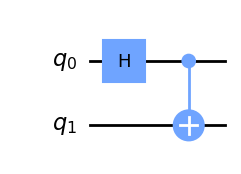

In [41]:
original_circuit.draw('mpl')


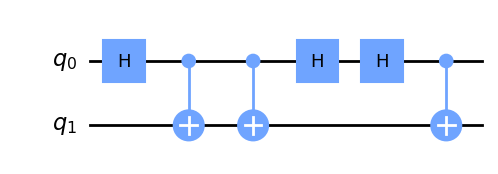

In [42]:
folded_circuit.draw('mpl')

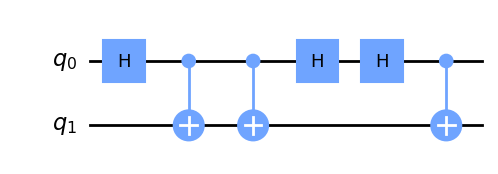

In [43]:
from mitiq.zne.scaling import fold_global
scaled_circuit = fold_global(original_circuit, scale_factor = 3)
scaled_circuit.draw('mpl')

In [50]:
from qiskit import QuantumCircuit, QuantumRegister
import qiskit.circuit.library.standard_gates as gates

def local_folding(circuit, start_index, end_index, scale_factor):
    if scale_factor < 1:
        raise ValueError("Scale factor must be >= 1.")
    
    # The number of additional sequences to add is scale_factor - 1
    additional_sequences = scale_factor - 2
    
    # Copy the original circuit
    folded_circuit = circuit.copy()
    
    # Extract the instructions to fold
    instructions_to_fold = circuit.data[start_index:end_index + 1]
    
    # Perform the local folding
    for _ in range(additional_sequences):
        for inst in instructions_to_fold:
            folded_circuit.data.insert(start_index, inst)
        for inst in reversed(instructions_to_fold):
            # Inverting the gate if necessary
            gate = inst[0]
            qubits = inst[1]
            clbits = inst[2]
            if isinstance(gate, gates.HGate):
                # Hadamard gate is self-inverse
                inverse_gate = gate
            elif isinstance(gate, gates.CXGate):
                # CNOT gate is self-inverse
                inverse_gate = gate
            else:
                raise NotImplementedError(f"Inverse for gate {gate.name} is not implemented.")
            # Insert the inverse gate
            folded_circuit.data.insert(start_index, (inverse_gate, qubits, clbits))
    
    return folded_circuit

# Create a simple circuit for demonstration
qr = QuantumRegister(2, name="q")
original_circuit = QuantumCircuit(qr)
original_circuit.h(qr[0])
original_circuit.cx(qr[0], qr[1])

# Apply local folding to the entire sequence of the circuit
start_index = 0
end_index = 1  # This includes both the H and the CX gate in the folding
scale_factor = 3
folded_circuit = local_folding(original_circuit, start_index, end_index, scale_factor)

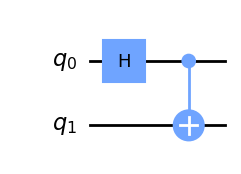

In [51]:
original_circuit.draw('mpl')





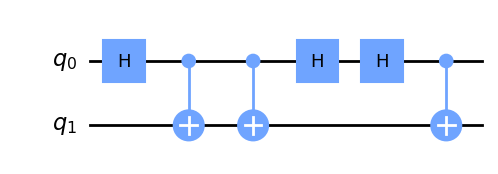

In [52]:
folded_circuit.draw('mpl')